<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Jan_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 24 files belonging to 2 classes.
Found 24 files belonging to 2 classes.
Class Names: ['Cat', 'Dog']


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_7 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 0.5139 - loss: 1.2110 - val_accuracy: 0.5000 - val_loss: 0.9316
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.6250 - loss: 1.1068 - val_accuracy: 0.5833 - val_loss: 0.8591
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 8s/step - accuracy: 0.7222 - loss: 0.9009 - val_accuracy: 0.7083 - val_loss: 0.7949
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6944 - loss: 0.8769 - val_accuracy: 0.7917 - val_loss: 0.7389
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.4861 - loss: 1.0743 - val_accuracy: 0.8750 - val_loss: 0.6875
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.7778 - loss: 0.6134 - val_accuracy: 0.9167 - val_loss: 0.6468
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.8472 - loss: 0.5825 - val_accuracy: 0.9583 - val_loss: 0.6123
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8264 - loss: 0.5793 - val_accuracy: 0.9583 - val_loss: 0.5818
Epoch 9/10
2/2

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


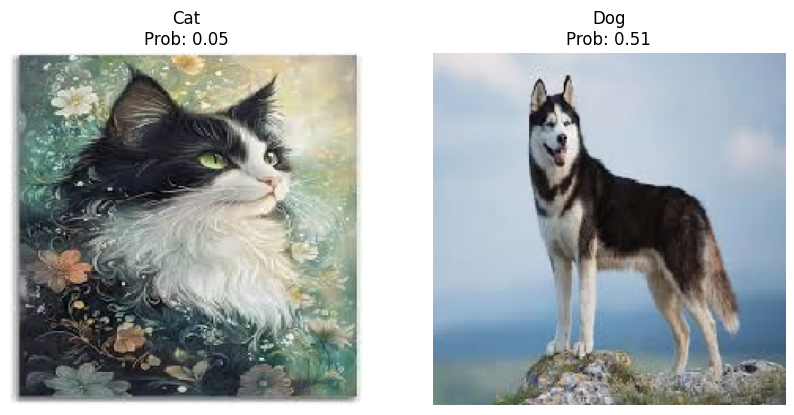

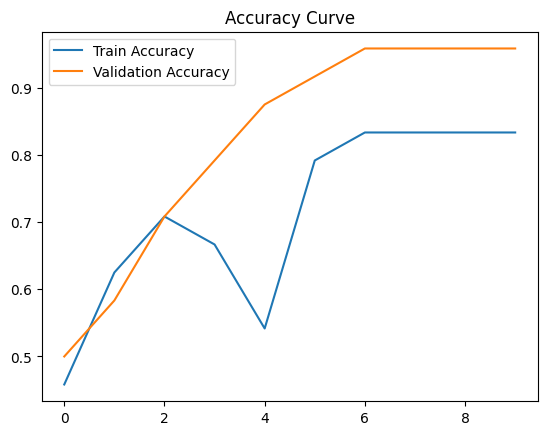

In [ ]:
# =====================================================
# CAT vs DOG CLASSIFICATION
# ResNet50 + Data Augmentation + Regularization
# =====================================================

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# SETTINGS
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10

# =====================================================
# LOAD DATA
# Folder structure:
# /content/Cat-Dog/train/Cat
# /content/Cat-Dog/train/Dog
# /content/Cat-Dog/test/Cat
# /content/Cat-Dog/test/Dog
# =====================================================
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Cat-Dog/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Cat-Dog/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_data.class_names
print("Class Names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# =====================================================
# DATA AUGMENTATION
# =====================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# =====================================================
# BASE MODEL (ResNet50)
# =====================================================
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

preprocess = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

# =====================================================
# BUILD MODEL
# =====================================================
model = models.Sequential([
    data_augmentation,
    layers.Lambda(preprocess),
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(
        128,
        activation="relu",
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid")
])

model.summary()

# =====================================================
# COMPILE
# =====================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# =====================================================
# TRAIN
# =====================================================
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# =====================================================
# EVALUATE
# =====================================================
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Accuracy: {acc * 100:.2f}%")

# =====================================================
# PREDICT TWO IMAGES (FIXED 🔥)
# =====================================================
image_paths = [
    "/content/Cat-Dog/test/Cat/12.jpg",
    "/content/Cat-Dog/test/Dog/1.jpg"
]

plt.figure(figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction >= 0.5)]

    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(f"{predicted_class}\nProb: {prediction:.2f}")
    plt.axis("off")

plt.show()

# =====================================================
# TRAINING CURVE
# =====================================================
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


Found 44 files belonging to 2 classes.
Found 29 files belonging to 2 classes.
Class Names: ['Beach', 'Mountain']


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_38 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_19 (Lambda)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.3695 - loss: 1.2708 - val_accuracy: 0.5862 - val_loss: 0.9595
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.4083 - loss: 1.3078 - val_accuracy: 0.6207 - val_loss: 0.8707
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4792 - loss: 1.1821 - val_accuracy: 0.6552 - val_loss: 0.8101
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6733 - loss: 0.9450 - val_accuracy: 0.7241 - val_loss: 0.7483
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5609 - loss: 1.0140 - val_accuracy: 0.7931 - val_loss: 0.7044
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.6867 - loss: 1.0220 - val_accuracy: 0.8621 - val_loss: 0.6718
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5774 - loss: 0.9719 - val_accuracy: 0.8621 - val_loss: 0.6445
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.6158 - loss: 0.9630 - val_accuracy: 0.8621 - val_loss: 0.6172
Epoch 9/

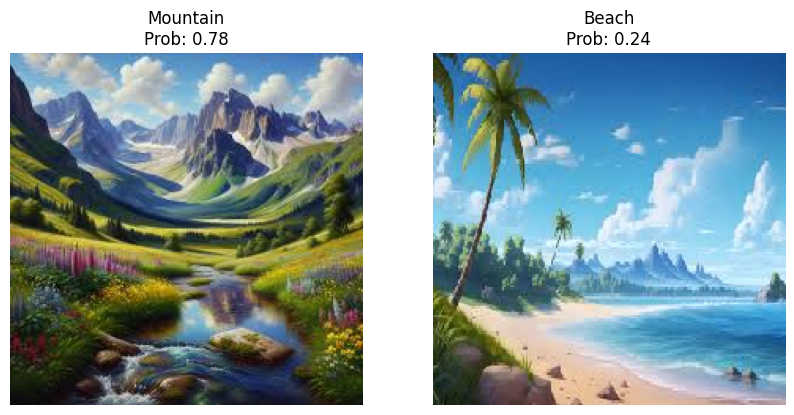

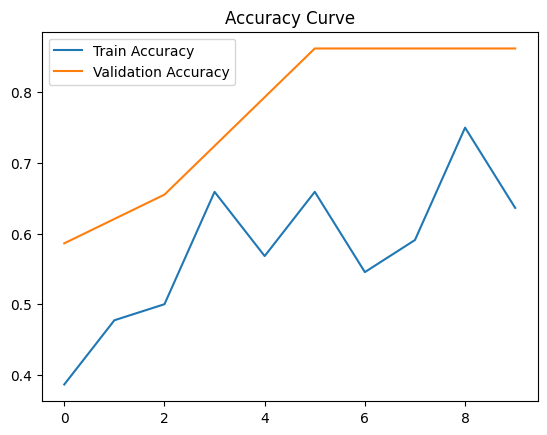

In [24]:
# =====================================================
# MOUNTAIN vs BEACH IMAGE CLASSIFICATION
# ResNet50 + Data Augmentation + Regularization
# =====================================================

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# SETTINGS
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10

# =====================================================
# LOAD DATA
# Folder structure:
# /content/Beach-Mountain/train/Beach
# /content/Beach-Mountain/train/Mountain
# /content/Beach-Mountain/test/Beach
# /content/Beach-Mountain/test/Mountain
# =====================================================
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Beach-Mountain/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Beach-Mountain/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_data.class_names
print("Class Names:", class_names)  # ['beach', 'mountain'] or vice versa

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# =====================================================
# DATA AUGMENTATION
# =====================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# =====================================================
# BASE MODEL (ResNet50)
# =====================================================
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

preprocess = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

# =====================================================
# BUILD MODEL
# =====================================================
model = models.Sequential([
    data_augmentation,
    layers.Lambda(preprocess),
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(
        128,
        activation="relu",
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid")
])

model.summary()

# =====================================================
# COMPILE
# =====================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# =====================================================
# TRAIN
# =====================================================
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# =====================================================
# EVALUATE
# =====================================================
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Accuracy: {acc * 100:.2f}%")

# =====================================================
# PREDICT TWO TEST IMAGES (FIXED 🔥)
# =====================================================
image_paths = [
    "/content/Beach-Mountain/test/Mountain /13.jpg",
    "/content/Beach-Mountain/test/Beach/4.jpg"
]

plt.figure(figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction >= 0.5)]

    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(f"{predicted_class}\nProb: {prediction:.2f}")
    plt.axis("off")

plt.show()

# =====================================================
# TRAINING ACCURACY CURVE
# =====================================================
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


Found 44 files belonging to 2 classes.
Found 29 files belonging to 2 classes.
Class Names: ['Beach', 'Mountain']


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_32 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_16 (Lambda)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.5335 - loss: 1.1624 - val_accuracy: 0.5862 - val_loss: 1.0257
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.6229 - loss: 0.8969 - val_accuracy: 0.6207 - val_loss: 0.9363
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.6106 - loss: 0.9269 - val_accuracy: 0.6552 - val_loss: 0.8678
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.6238 - loss: 0.8249 - val_accuracy: 0.7241 - val_loss: 0.8013
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4641 - loss: 1.0128 - val_accuracy: 0.7586 - val_loss: 0.7415
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.5903 - loss: 1.0415 - val_accuracy: 0.7931 - val_loss: 0.6883
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.5733 - loss: 0.9255 - val_accuracy: 0.8276 - val_loss: 0.6451
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.7045 - loss: 0.8076 - val_accuracy: 0.8276 - val_loss: 0.6143
Epoch 9/

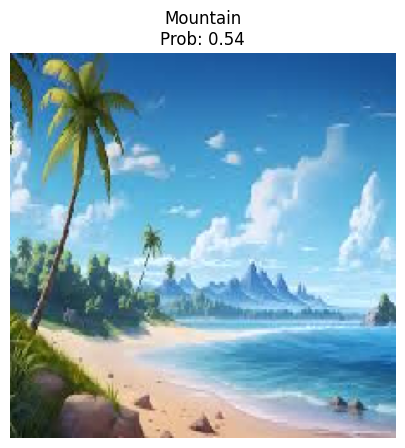

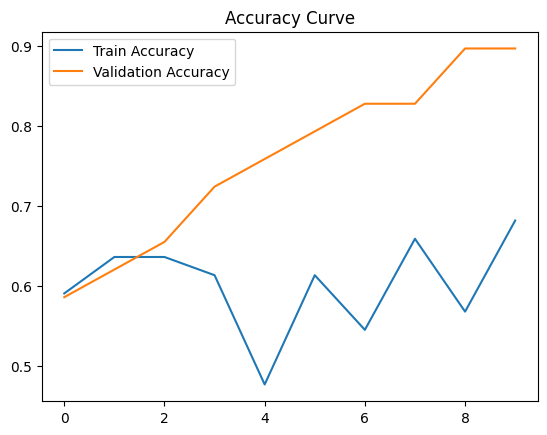

In [ ]:
# =====================================================
# MOUNTAIN vs BEACH IMAGE CLASSIFICATION
# ResNet50 + Data Augmentation + Regularization
# =====================================================

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# SETTINGS
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10

# =====================================================
# LOAD DATA
# Folder structure:
# /content/Beach-Mountain/train/Beach
# /content/Beach-Mountain/train/Mountain
# /content/Beach-Mountain/test/Beach
# /content/Beach-Mountain/test/Mountain
# =====================================================
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Beach-Mountain/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Beach-Mountain/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_data.class_names
print("Class Names:", class_names)  # ['beach', 'mountain'] or vice versa

AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# =====================================================
# DATA AUGMENTATION
# =====================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# =====================================================
# BASE MODEL (ResNet50)
# =====================================================
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

preprocess = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

# =====================================================
# BUILD MODEL
# =====================================================
model = models.Sequential([
    data_augmentation,
    layers.Lambda(preprocess),
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(
        128,
        activation="relu",
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid")
])

model.summary()

# =====================================================
# COMPILE
# =====================================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# =====================================================
# TRAIN
# =====================================================
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# =====================================================
# EVALUATE
# =====================================================
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Accuracy: {acc * 100:.2f}%")

# =====================================================
# PREDICT TWO TEST IMAGES (FIXED 🔥)
# =====================================================
image_paths = [
    "/content/Beach-Mountain/test/Mountain /1.jpg",
    "/content/Beach-Mountain/test/Beach/4.jpg"
]

plt.figure(figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction >= 0.5)]

    plt.imshow(img)
    plt.title(f"{predicted_class}\nProb: {prediction:.2f}")
    plt.axis("off")

plt.show()

# =====================================================
# TRAINING ACCURACY CURVE
# =====================================================
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()
